<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/6_product_year_sales_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6. 제품군 별 연도별 매출 추세 분석
* 연도별로 매출액이 상승하는 제품군과 하락하는 제품군 분석.
* 제품군 내에서 어떤 제품이 연도별로 매출액이 상승하는지 하락하는지 분석.

#### 회사 전략
* **성장 추세 분석**: 성장 추세가 긍정적인 제품군이나 제품에 대해 추가적인 마케팅 자원을 투입하고, 생산을 확대할 수 있음.

* **성과 개선**: 매출이 감소하는 추세를 보이는 제품군이나 제품에 대해서는 시장 조사, 고객 피드백 수집, 제품 개선 등을 통해 성과를 개선할 방안을 모색.
* **시장 기회 발굴**: 연도별 매출 데이터를 통해 특정 시기에 수요가 증가하는 제품군이나 제품을 식별하고, 이를 바탕으로 새로운 시장 기회를 발굴할 수 있음.

* **재고 관리 최적화**: 제품별, 제품군별 매출 추세를 분석하여, 재고 관리 전략을 최적화하고, 과잉 재고나 품절 위험을 줄일 수 있음.


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)

# 제품군별 연도별 매출 추세 쿼리
query ="""
SELECT p.productLine, Year(o.orderDate) AS orderYear,
sum(od.quantityOrdered * od.priceEach) as total_sales
FROM products p
JOIN orderdetails od ON od.productCode = p.productCode
JOIN orders o ON o.orderNumber = od.orderNumber
GROUP BY p.productLine, orderYear
ORDER BY p.productLine, orderYear
;
"""

# 데이터프레임 생성
df = pd.read_sql_query(query, conn)
df

C:\Users\user\AppData\Local\Temp\ipykernel_9712\1721744952.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,productLine,orderYear,total_sales
0,Classic Cars,2003,1374832.22
1,Classic Cars,2004,1763136.73
2,Classic Cars,2005,715953.54
3,Motorcycles,2003,348909.24
4,Motorcycles,2004,527243.84
5,Motorcycles,2005,245273.04
6,Planes,2003,309784.20
7,Planes,2004,471971.46
8,Planes,2005,172881.88
9,Ships,2003,222182.08


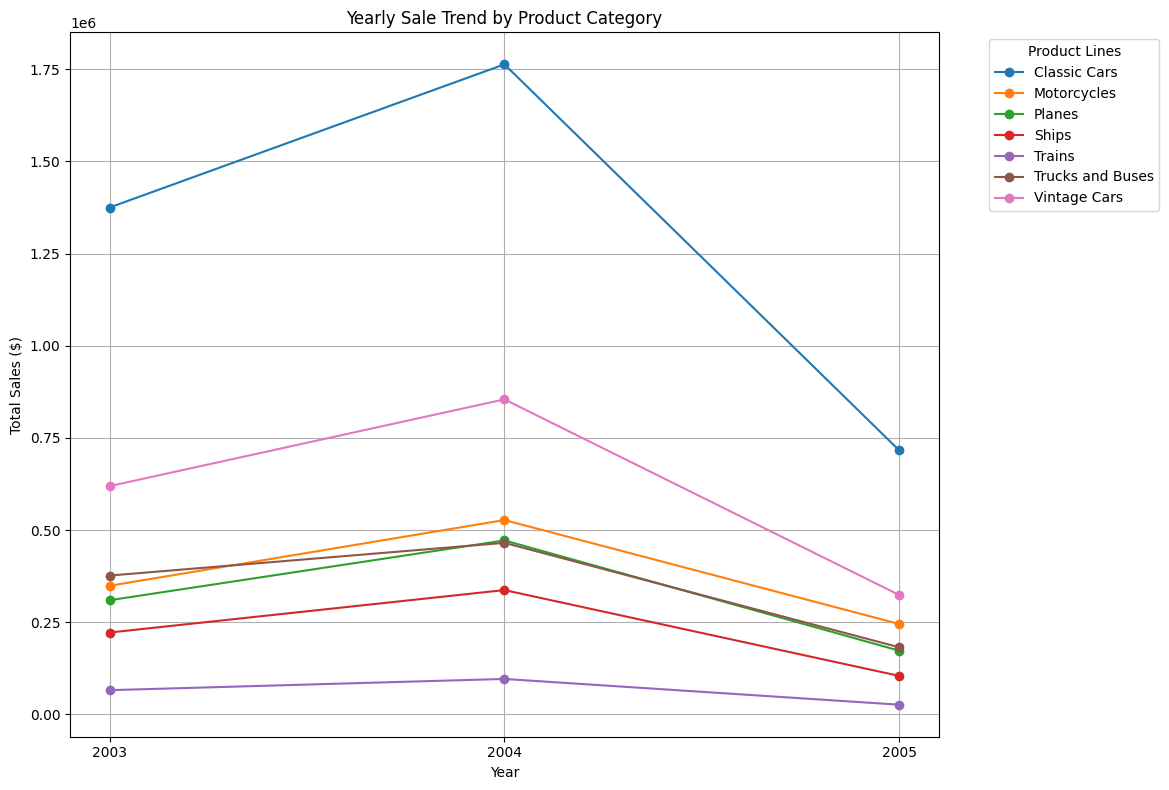

In [ ]:
# 시각화
plt.figure(figsize = (14,8))
product_lines = df['productLine'].unique()

for product_line in product_lines:
  subset = df[df['productLine']==product_line]
  plt.plot(subset['orderYear'].astype(str), subset['total_sales'], marker = 'o', linestyle = '-', label = product_line)

plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.title('Yearly Sale Trend by Product Category')
plt.grid()
plt.legend(title = 'Product Lines', bbox_to_anchor = (1.05, 1), loc='upper left')
plt.tight_layout(rect=[0,0,0.85,1])
plt.show()

#### 인사이트 도출
* 매출의 절대값은 **classic car**가 가장 크다
* 2005년 상반기 데이터까지 있기 때문에 감소 추세는 합리적이나, **classic car**의 감소추세가 가장 높다.

### 제품 군 내 제품들의 연도별 매출 추세 분석

In [ ]:
# mysql - python 연동
conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)

# 제품군 내 제품의 연도별 매출 추세 쿼리
query_detail ="""
SELECT p.productLine, p.productName,
  Year(o.orderDate) AS orderYear,
  sum(od.quantityOrdered * od.priceEach) as total_sales
FROM products p
JOIN orderdetails od ON od.productCode = p.productCode
JOIN orders o ON o.orderNumber = od.orderNumber
GROUP BY p.productLine, p.productName, orderYear
ORDER BY p.productLine, p.productName, orderYear
;
"""

# 데이터프레임 생성
df_detail = pd.read_sql_query(query_detail, conn)
df_detail

C:\Users\user\AppData\Local\Temp\ipykernel_9712\1500964341.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_detail = pd.read_sql_query(query_detail, conn)


,productLine,productName,orderYear,total_sales
0,Classic Cars,1948 Porsche 356-A Roadster,2003,25118.94
1,Classic Cars,1948 Porsche 356-A Roadster,2004,27882.47
2,Classic Cars,1948 Porsche 356-A Roadster,2005,13454.21
3,Classic Cars,1948 Porsche Type 356 Roadster,2003,49863.32
4,Classic Cars,1948 Porsche Type 356 Roadster,2004,48908.34
...,...,...,...,...
322,Vintage Cars,1940 Ford Delivery Sedan,2004,34061.18
323,Vintage Cars,1940 Ford Delivery Sedan,2005,14586.96
324,Vintage Cars,1941 Chevrolet Special Deluxe Cabriolet,2003,30499.99
325,Vintage Cars,1941 Chevrolet Special Deluxe Cabriolet,2004,51118.50


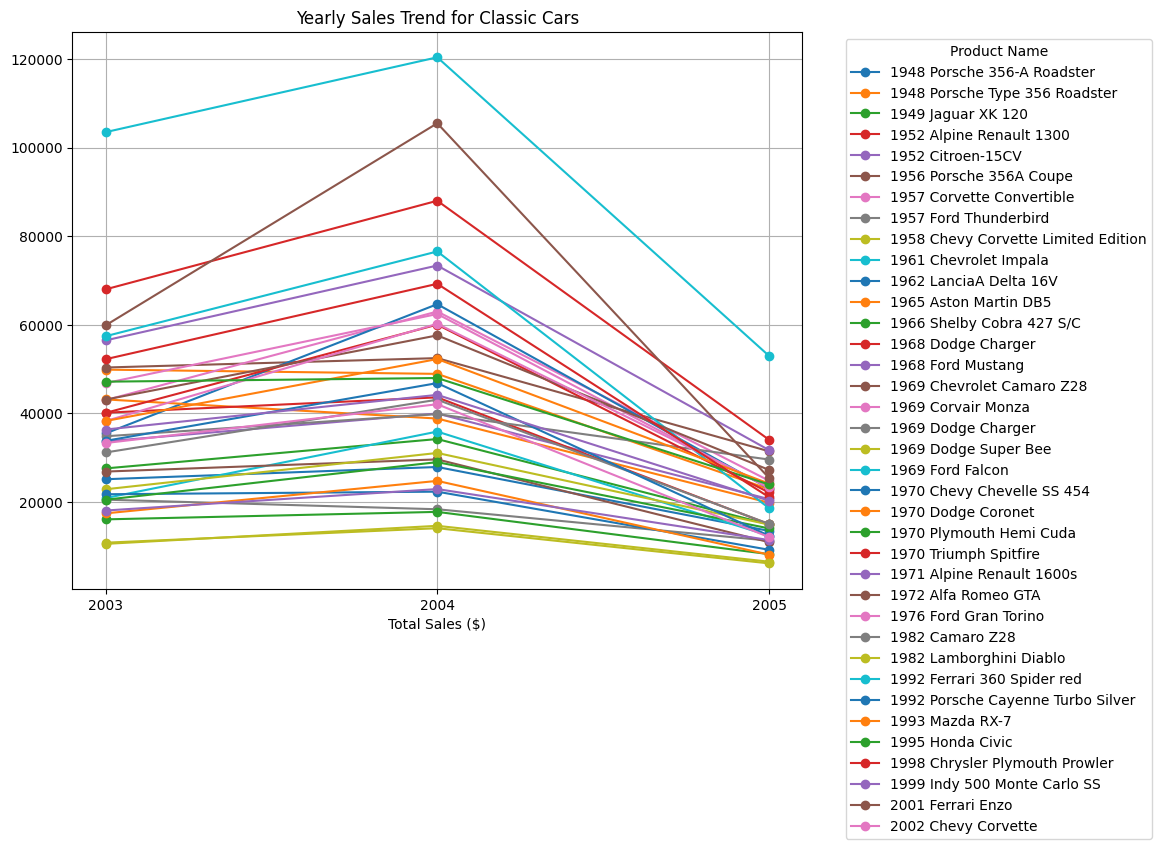

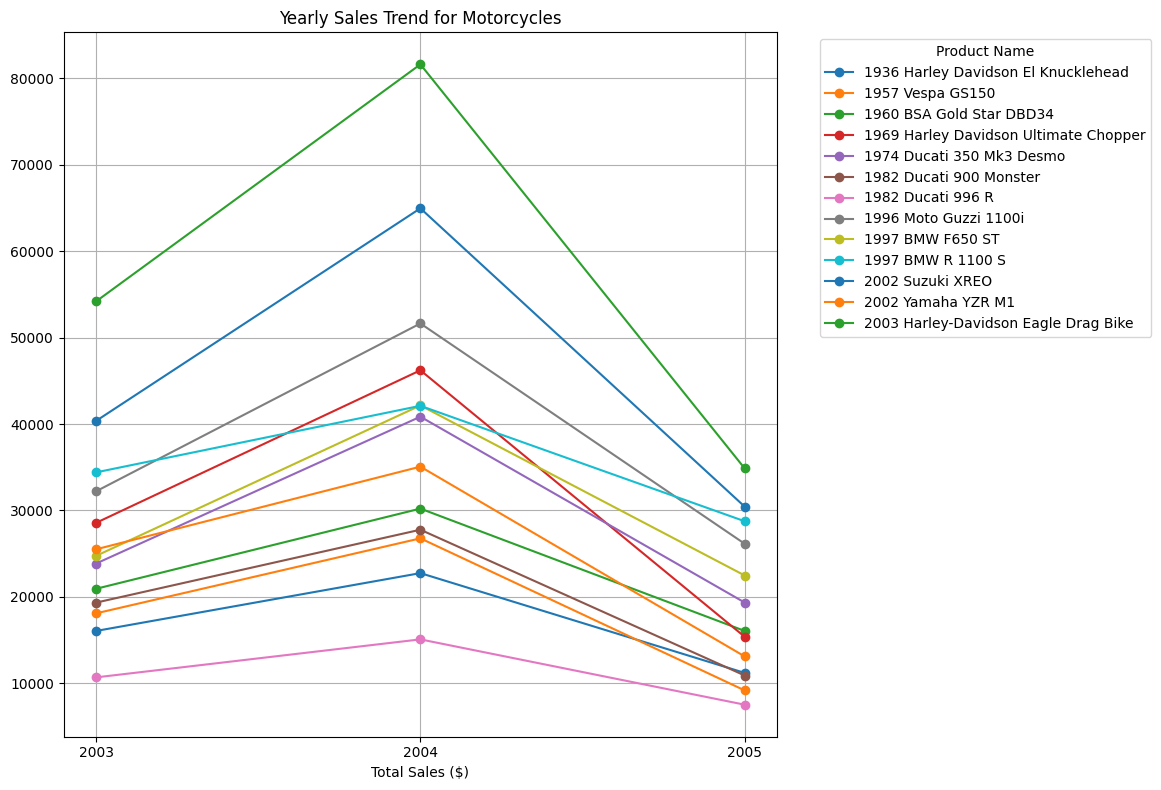

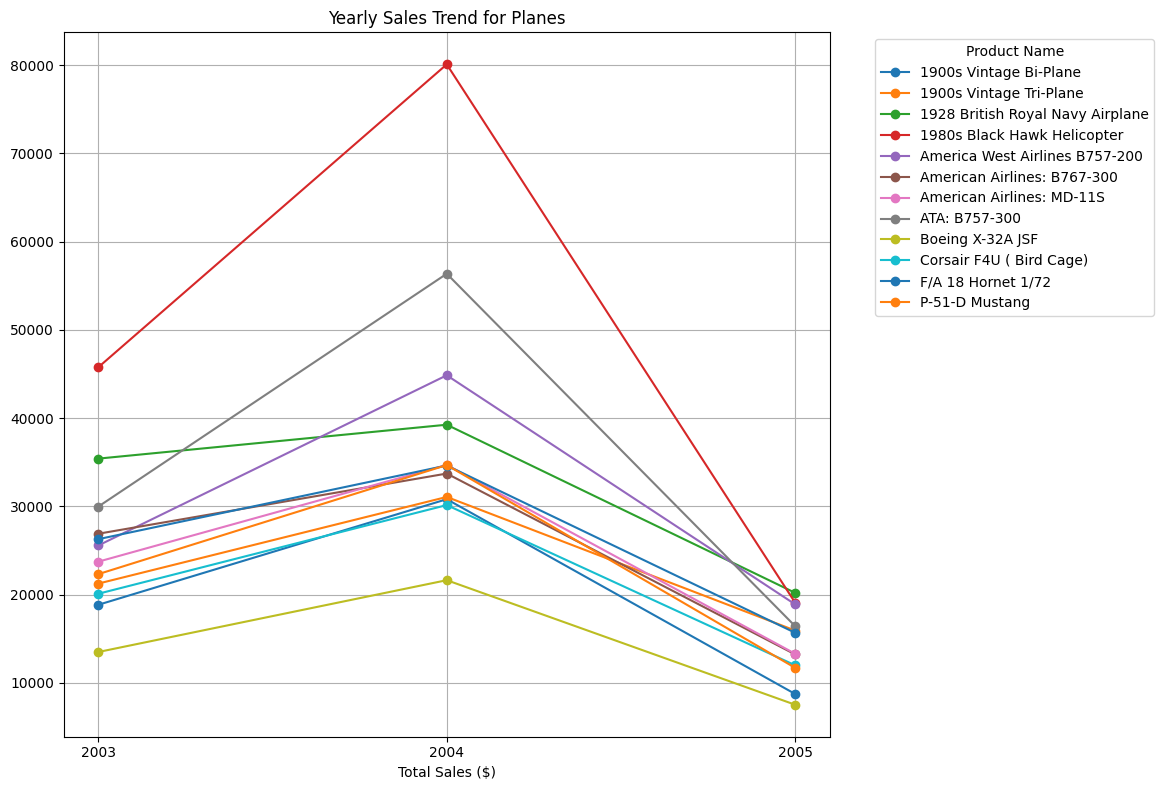

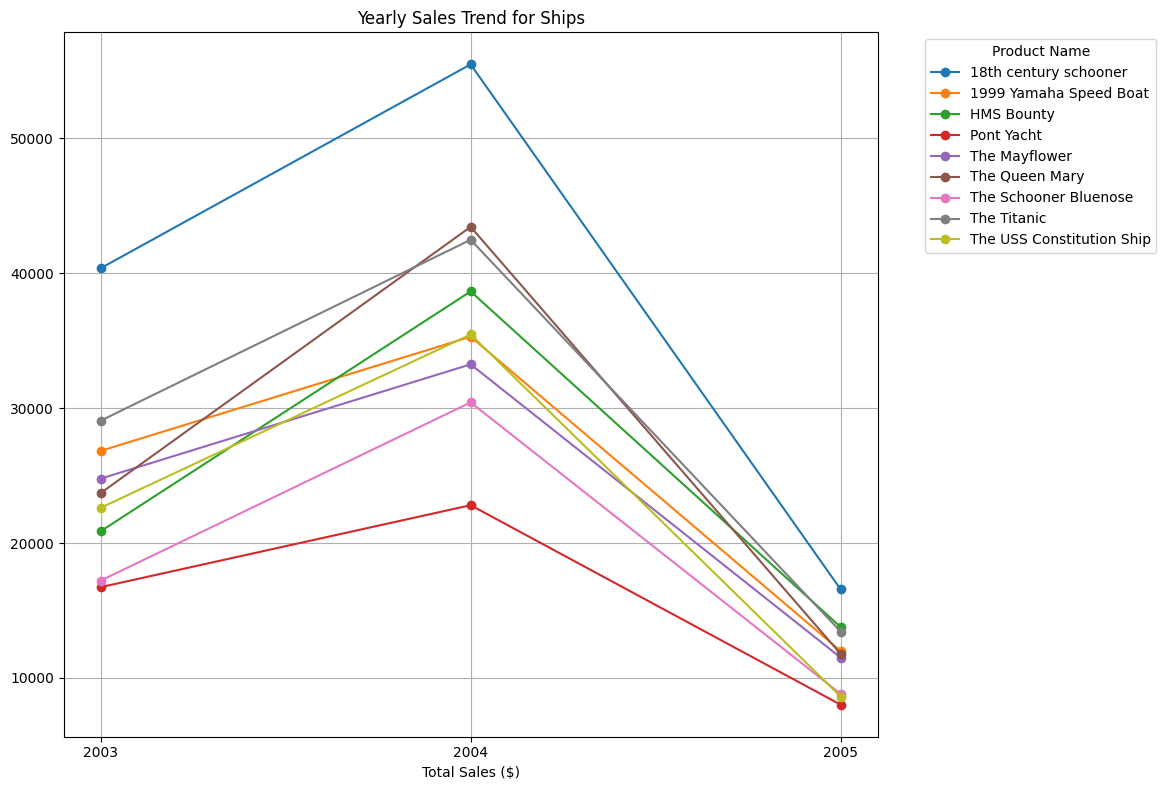

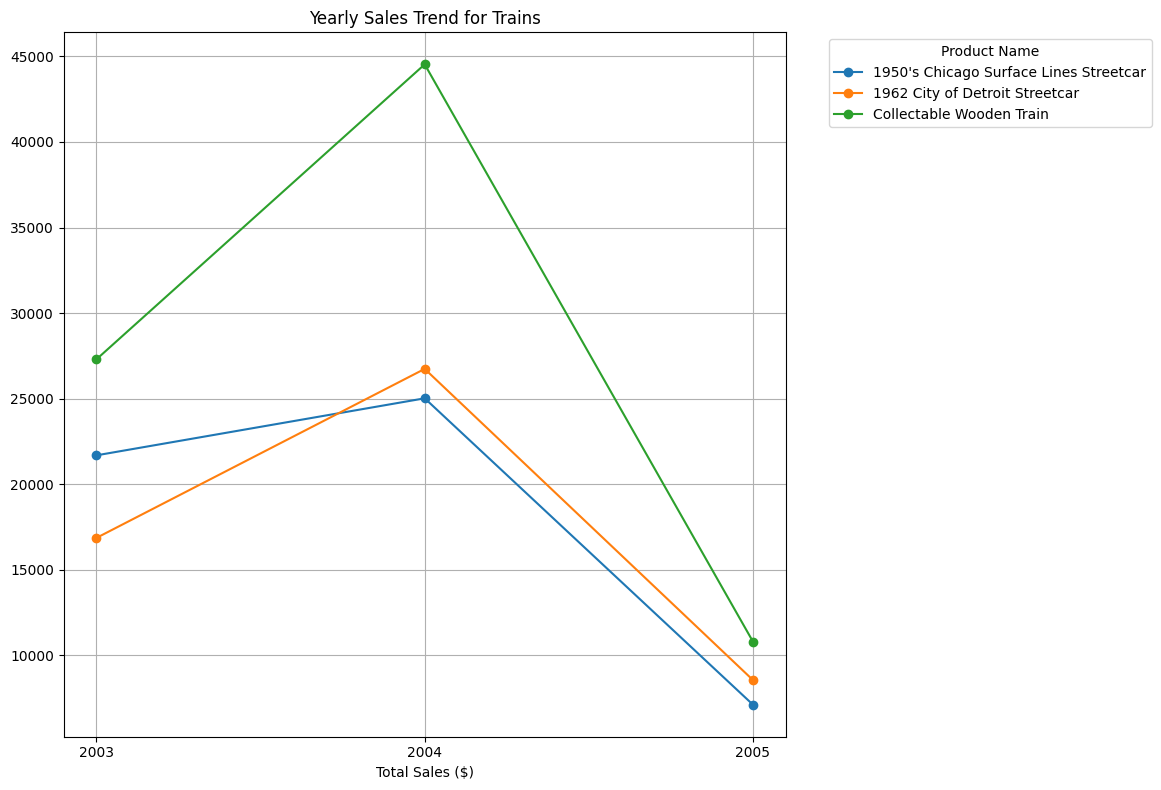

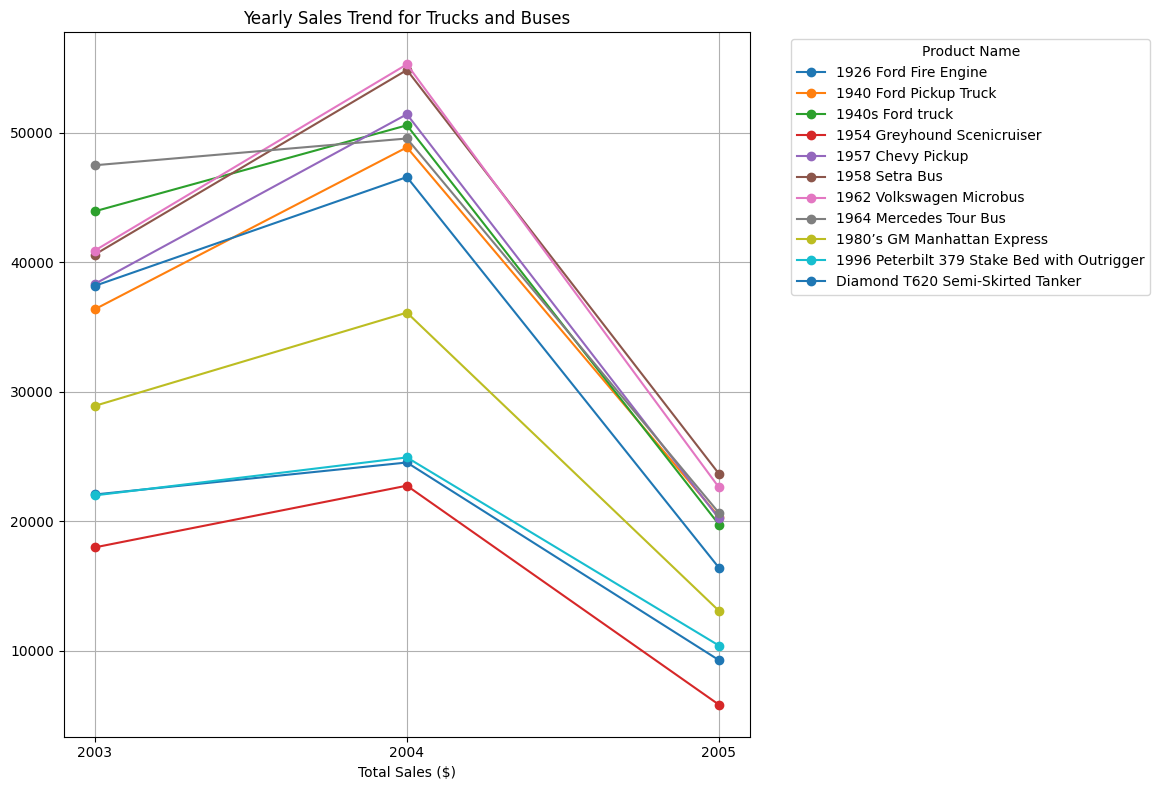

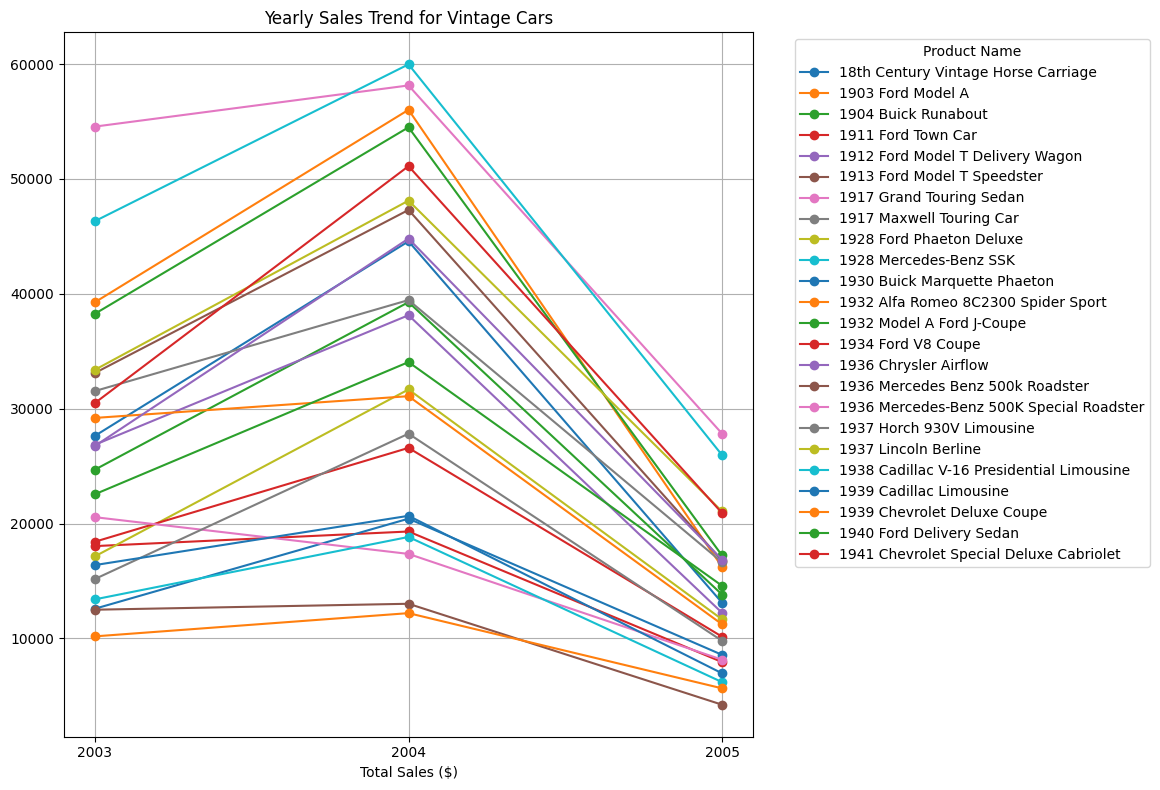

In [ ]:
# 제품군별 시각화
product_lines = df_detail['productLine'].unique()

for product_line in product_lines:
  plt.figure(figsize=(14,8))
  subset= df_detail[df_detail['productLine'] == product_line]
  products = subset['productName'].unique()
  for product in products:
    product_subset = subset[subset['productName']==product]
    plt.plot(product_subset['orderYear'].astype(str), product_subset['total_sales'], marker='o', linestyle='-', label=product)
  plt.xlabel('Year')
  plt.xlabel('Total Sales ($)')
  plt.title(f'Yearly Sales Trend for {product_line}')
  plt.legend(title='Product Name',bbox_to_anchor=(1.05,1), loc='upper left')
  plt.grid()
  plt.tight_layout(rect=[0,0,0.85,1])
  plt.show()

#### 인사이트 도출
* 7개의 product line 중 **planes** 제품군의 **1980s balck hawk helicopter**가 가장 가파른 상승 후 가장 큰 감소를 나타냄.